Spatial Data Analysis

__Evelyn Uuemaa, PhD__

- Course supplement
    Students upload a csv file and can do box-plots based on the file. They are then also able to download the images for reporting.

## How to use this notebook

Highlight the top cell and click the "Run" button to execute the cells and move the program forward. If anything goes wrong, you can easily restart from the beginning.

In [1]:
from IPython.display import display
import ipywidgets as widgets

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

%matplotlib inline

In [2]:
upload = widgets.FileUpload( accept='.csv', multiple=False )

csv_delimiter = ","
text_encoding = "utf8"

In the next cell, you need to upload the csv-file from your computer.

In [3]:
upload

FileUpload(value={}, accept='.csv', description='Upload')

After you selected the file, the upload field should show (1), that means the file is now selected.

Click on the next cell to continue...

In [4]:
filestream_encoding = "latin1"

t = upload.data[0].decode(encoding=filestream_encoding)

with open('tmp.csv', 'w', encoding=text_encoding) as fh:
    fh.write(t)

df = pd.read_csv('tmp.csv', encoding=text_encoding, sep=csv_delimiter)

df.head(10)

,fid,LINE_ID,DISTANCE,X,Y,type
0,1,VÃµle - Vainupea - Kunda,746.641394,631987.6460,6603979.404,fire
1,2,Meossaare tee,8.359085,595267.5550,6504521.095,fire
2,3,Rae,356.416940,503457.8580,6578908.705,fire
3,4,JÃµhvi - Ereda,87.466517,687392.1665,6582281.763,fire
4,5,Lagedi - Oru,350.103891,702764.2110,6587017.072,fire
5,6,JÃµhvi - Tartu - Valga,334.129808,639550.7200,6456868.374,fire
6,7,Vao tee,21.303824,625919.7402,6553212.213,fire
7,8,Kaagvere kooli tee,44.982500,669223.8326,6470931.203,fire
8,9,Puskaru - VÃ¤imela,316.707308,676513.8837,6422293.751,fire
9,10,Kehra jaama tee,238.320820,575838.4640,6578060.988,fire


Now we have the data loaded into the dataframe and we can run the statistics and plots. In the following cell configure the names of the class column and the value columns if needed.

In [5]:
classes = "type"

values = "DISTANCE"

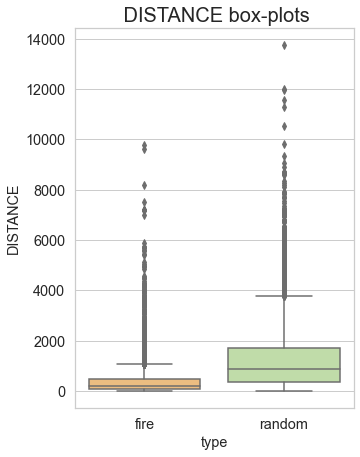

In [6]:
df['values_prep'] = pd.to_numeric(df[values], errors='coerce')

df = df.rename(columns={values : f"{values}_"})
df = df.rename(columns={'values_prep' : values})

fig, ax = plt.subplots(figsize=(5,7))

sns.boxplot(x=classes, y=values, data=df.dropna(subset=[classes, values]), palette="Spectral")
plt.xticks(
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large', 
)
plt.xlabel(classes, fontsize='x-large')
plt.yticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
)
plt.ylabel(values, fontsize='x-large')

plt.title(f" {values} box-plots", fontsize=20)

plt.savefig('boxplots.png', bbox_inches='tight', transparent=False)
plt.show()

[download the image from here](boxplots.png)

Alternatively, just copy the image directly from the browser with mouse click.

**How to interpret the box-plots**
Box plots are used to show overall patterns of characteristic for a group. They provide a useful way to visualise the range and other characteristics of characteristics for a large group.
The middle line marks the median (middle quartile) which is the mid-point of the data. Half the scores are greater than or equal to this value and half are less.

The middle “box” represents the inter-quartile range i.e. middle 50% of scores for the group. The range of scores from lower to upper quartile is referred to as the inter-quartile range. The middle 50% of scores fall within the inter-quartile range.

The upper and lower whiskers represent scores outside the middle 50%. Whiskers often (but not always) stretch over a wider range of scores than the middle quartile groups.

## Mann-Whitney U test

A Mann-Whitney U test (sometimes called the Wilcoxon rank-sum test) is used to compare the differences between two independent samples when the sample distributions are not normally distributed and the sample sizes are small.

In [7]:
from scipy.stats import mannwhitneyu

if not len(df[classes].unique()) == 2:
    print("Warning, to compare two groups in the statistical tests, we need only two different types in classes")

group1 = df.loc[df[classes] == df[classes].unique()[0]][values]
group2 = df.loc[df[classes] == df[classes].unique()[1]][values]

#perform the Mann-Whitney U test
result = mannwhitneyu(group1, group2, alternative='two-sided')
print(f"The test statistic is {result.statistic}")
print(f"The corresponding two-sided p-value is {result.pvalue}")

The test statistic is 16362197.0
The corresponding two-sided p-value is 0.0


**How to interpret the results**

The Mann-Whitney U Test uses the following null and alternative hypotheses:

H0 (Null Hypothesis): The distribution of values is equal between the two groups

HA (Alternative Hypothesis): The distribution of values is NOT equal between the two groups

If the p-value is not smaller than 0.05, we fail to reject the null hypothesis. Therefore, if p<0.05 then there is statistically significant difference between the two groups.